In [97]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

In [98]:
#CARREGAR ARQUIVO
df = pd.read_csv("dados/marketing_AB.csv")

In [99]:
#VISUALIZAR ARQUIVO
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [100]:
#REMOVER TABELA Unnamed
df = df.drop("Unnamed: 0", axis=1)

In [101]:
#CRIAND UMA FUNÇÃO LAMBDA PARA RENOMEAR E REMOVER OS ESPAÇOS
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [102]:
#VISUALIZAR A QUANTIDADE DE VALORES ENTRE CONVERTIDOS E NÃO CONVERTIDOS
df["converted"].value_counts()

False    573258
True      14843
Name: converted, dtype: int64

In [103]:
#RENOMEANDO A TABELA CONVERTED
df.loc[df["converted"] == True, "converted"] = 1
df.loc[df["converted"] == False, "converted"] = 0

In [104]:
#VISUALIZANDO NOVAMENTE
df.head()

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


In [105]:
#PROCURANDO VALORES NULOS
df.isnull().sum()

user_id          0
test_group       0
converted        0
total_ads        0
most_ads_day     0
most_ads_hour    0
dtype: int64

In [106]:
#PROCURANDO LINHAS DUPLICADAS
df.duplicated().sum()

0

In [107]:
#VISUALIZANDO A QUANTIDADE DE REGISTROS POR GRUPO
df["test_group"].value_counts()

ad     564577
psa     23524
Name: test_group, dtype: int64

In [108]:
#RENOMEANDO OS GRUPOS, ATRIBUINDO A PARA O GRUPO DE CONTROLE E B PARA O GRUPO DE TRATAMENTO
df.loc[df["test_group"] == "ad", "test_group"] = "B"
df.loc[df["test_group"] == "psa", "test_group"] = "A"

In [109]:
#CRIANDO DF EXCLUSIVO PARA OS GRUPOS
df_a = df[df["test_group"] == "A"]
df_b = df[df["test_group"] == "B"]


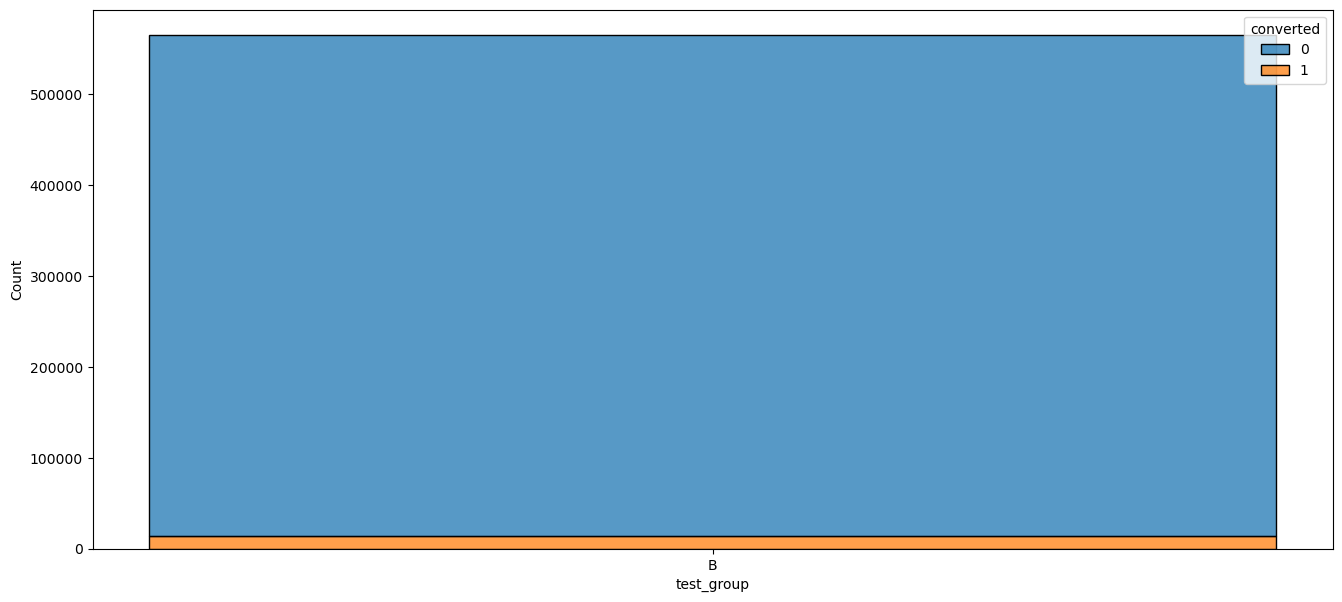

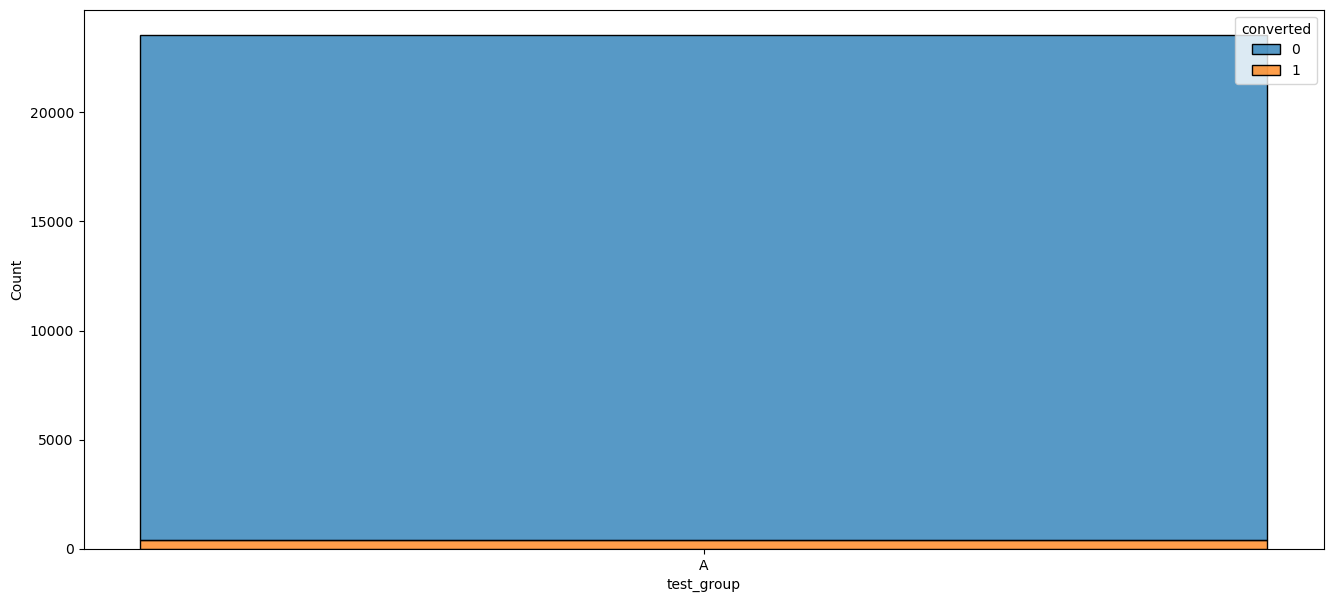

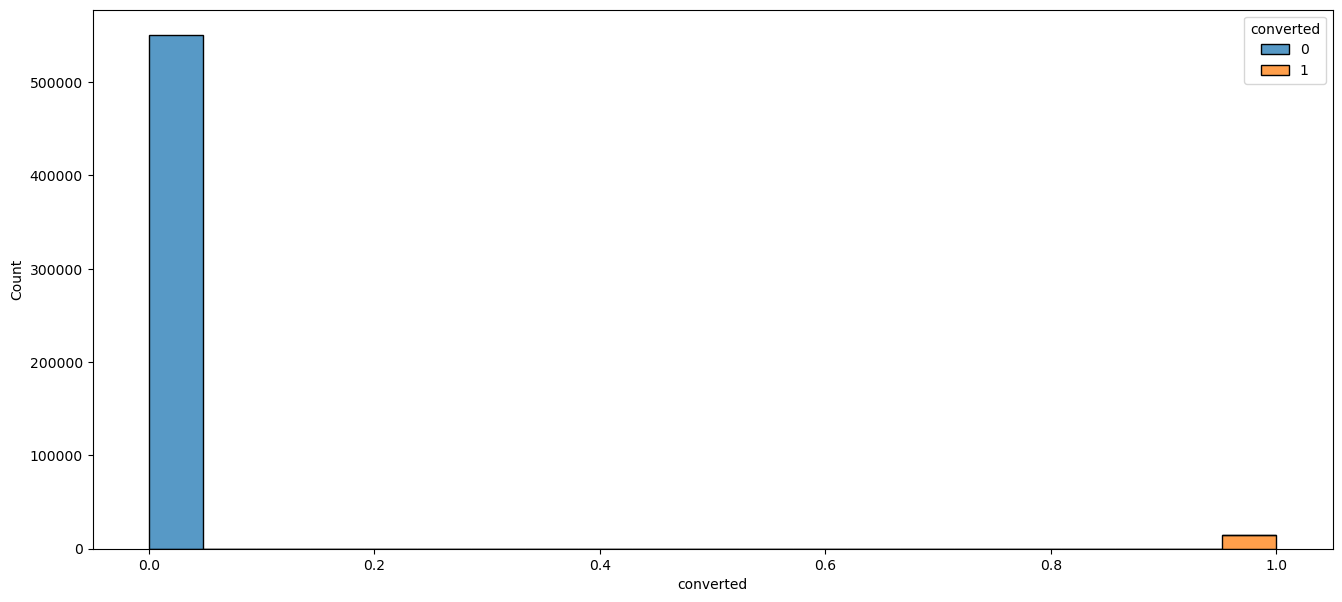

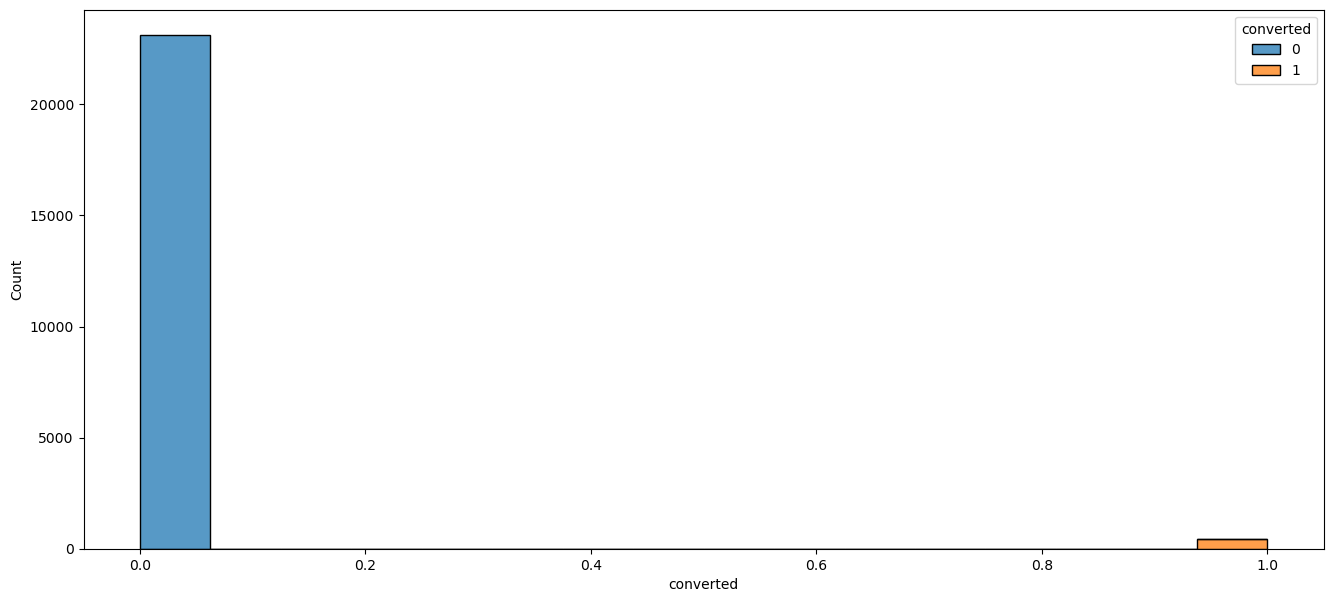

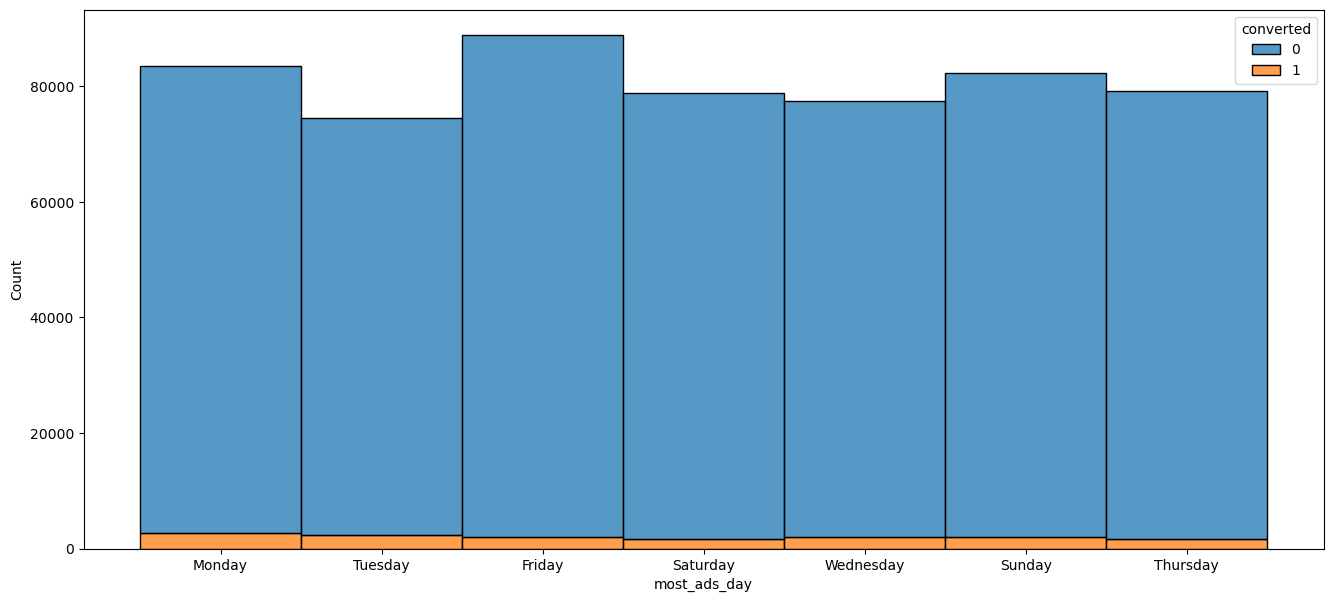

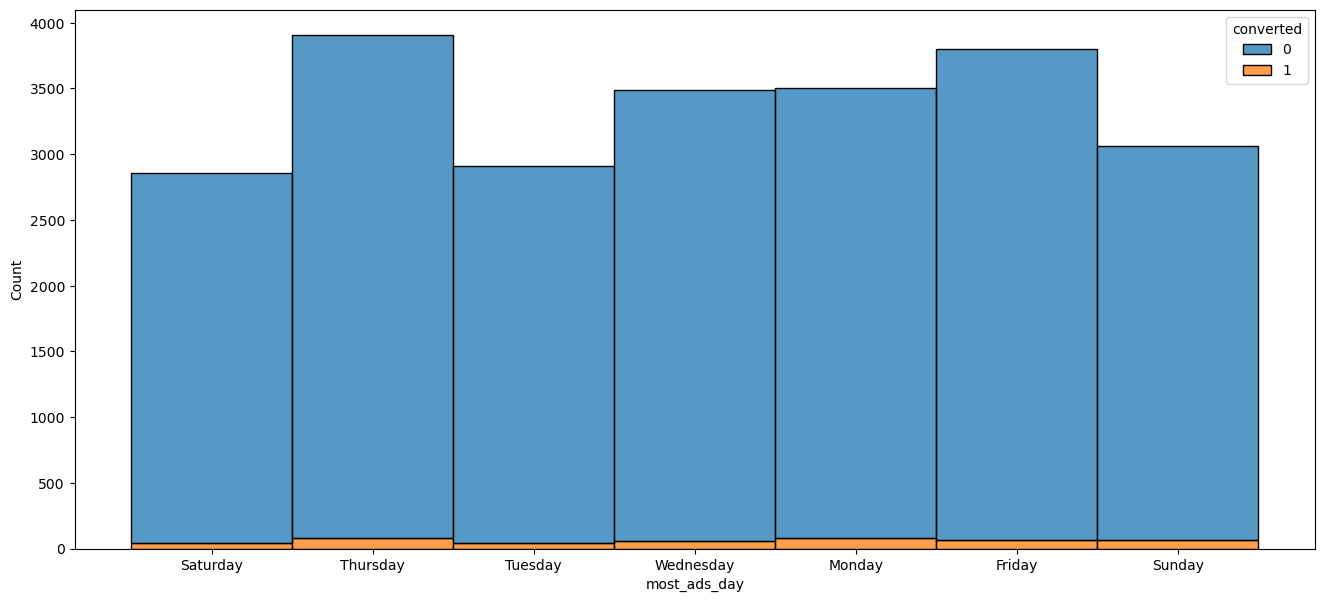

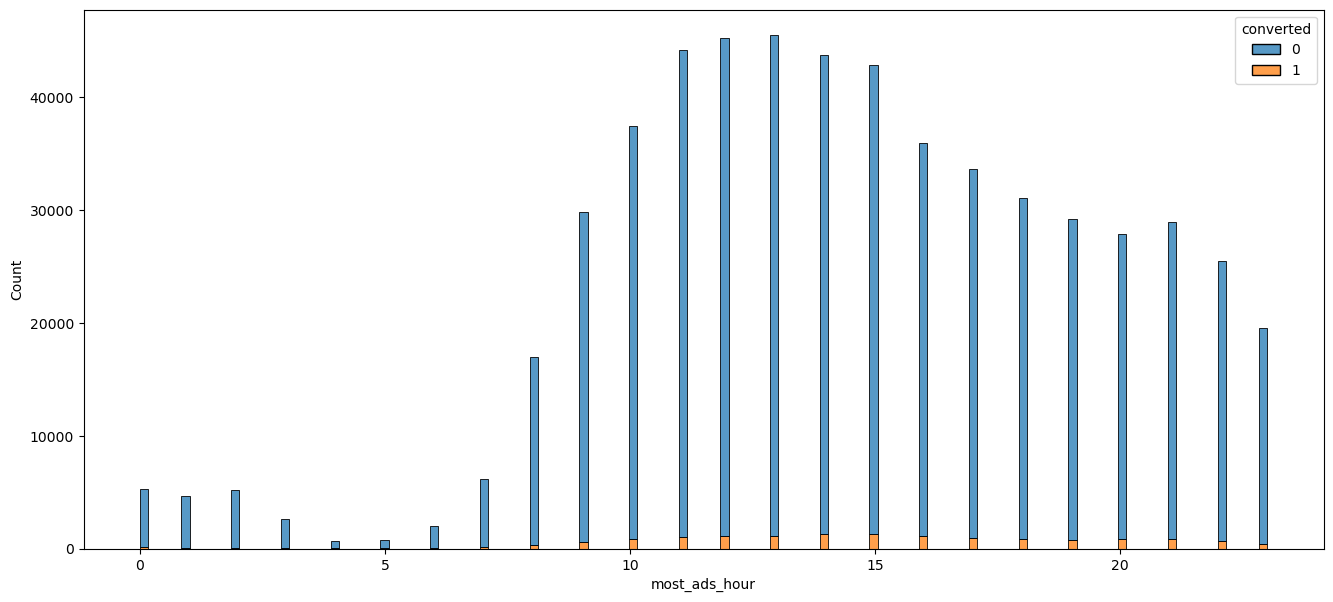

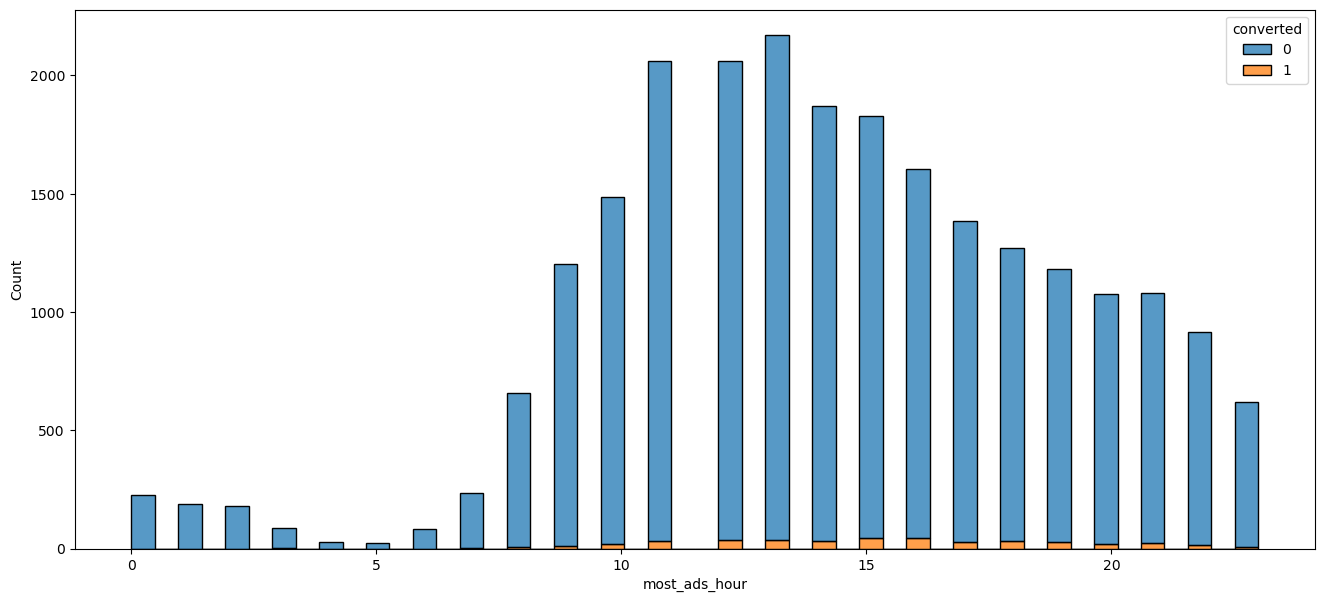

In [110]:
#GERANDO GRÁFICOS DOS GRUPOS

for i in df.columns.drop(["user_id", "total_ads"]).to_list():
    plt.figure(figsize=(16, 7))
    sns.histplot(data=df_b, x=i, hue="converted", multiple="stack")
    plt.show()
    plt.figure(figsize=(16, 7))
    sns.histplot(data=df_a, x=i, hue="converted", multiple="stack")
    plt.show()

In [112]:
#CRIANDO UM GROUPBY PARA SEPARAR OS GRUPOS POR VALOR EM CONVERTED.
counts = df.groupby('test_group')['converted'].value_counts()
counts


test_group  converted
A           0             23104
            1               420
B           0            550154
            1             14423
Name: converted, dtype: int64

In [ ]:
#TOTAL CONVERTIDO
convertido_A = counts[1]
convertido_B = counts[3]

#TAMANHO DA AMOSTRA
total_A = counts[0] + counts[1]
total_B = counts[2] + counts[3]

#PORCENTAGEM DE CONVERSÃO E NÃO CONVERSÃO
p_conversao_a1 = counts[1] / (sum(counts[[0, 1]]))
p_conversao_b1 = counts[3] / (sum(counts[[2, 3]]))

print(f"A não convertido {round(p_conversao_a0 * 100, 2)}%, A Convertido {round(p_conversao_a1 * 100, 2)}% do TOTAL, B não convertido {round(p_conversao_b0 * 100, 2)}%, B convertido {round(p_conversao_b1 * 100, 2)}%")


A não convertido 98.21%, A Convertido 1.79% do TOTAL, B não convertido 97.45%, B convertido 2.55%


Text(0, 0.5, 'Probabilidade')

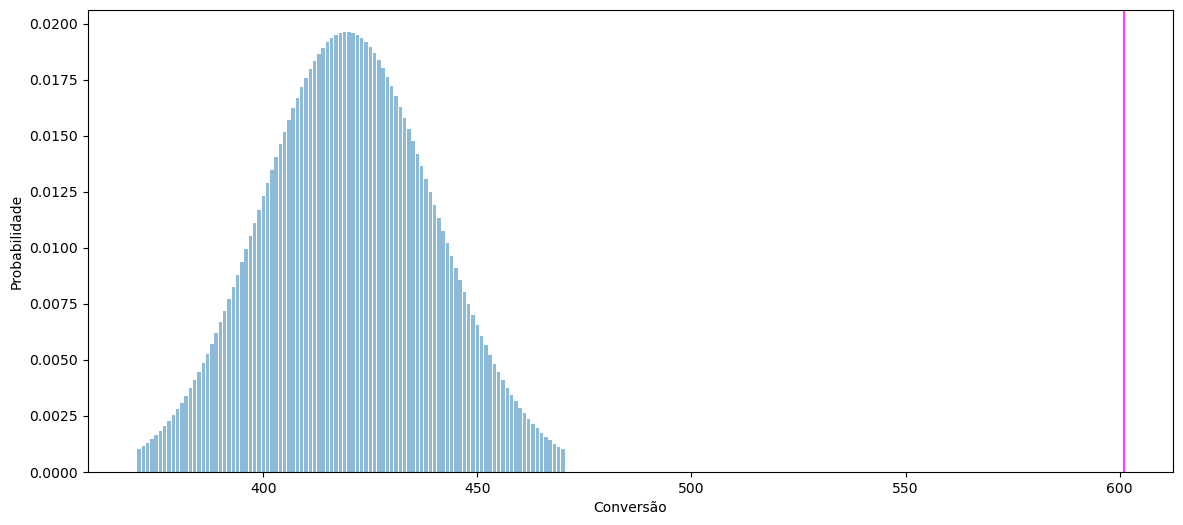

In [ ]:
# Plot da distribuição do grupo A (controle)

# Área de plotagem
fig, ax = plt.subplots(figsize = (14,6))

# Teste de A
x = np.linspace(convertido_A - 49, convertido_A + 50, 100)
y = scs.binom(total_A, p_conversao_a1).pmf(x)

# Cria a barra vertical
ax.bar(x, y, alpha = 0.5)
ax.axvline(x = p_conversao_b1 * total_A, c = 'magenta', alpha = 0.75, linestyle = '-')

# Labels
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')

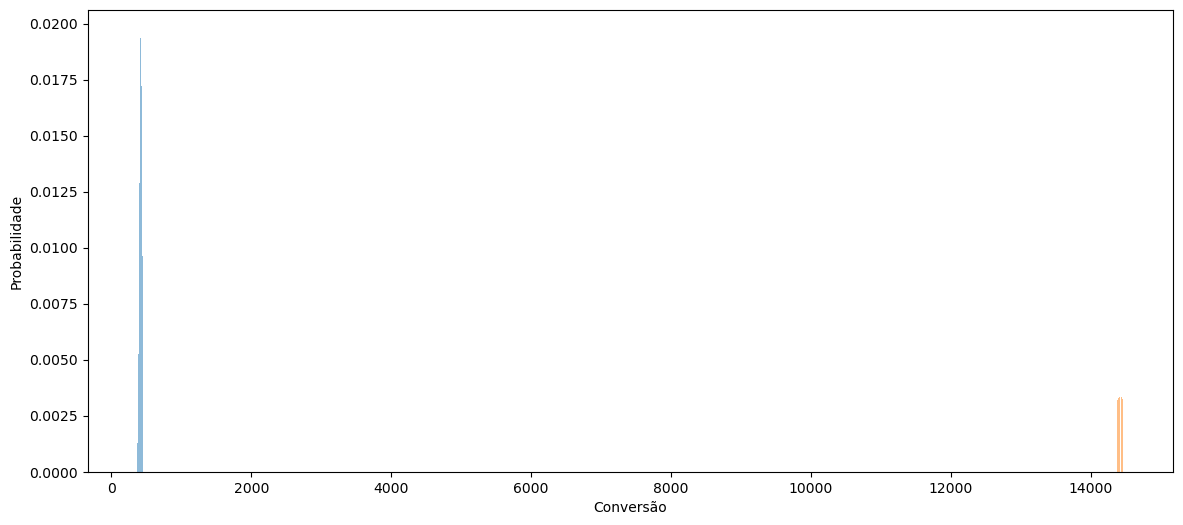

In [119]:
# Plot da distribuição dos 2 grupos

# Área de plotagem 
fig, ax = plt.subplots(figsize = (14,6))

# Gráfico de A
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha = 0.5)
xB = np.linspace(convertido_B - 49, convertido_B + 50, 100)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha = 0.5)
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')
plt.show()

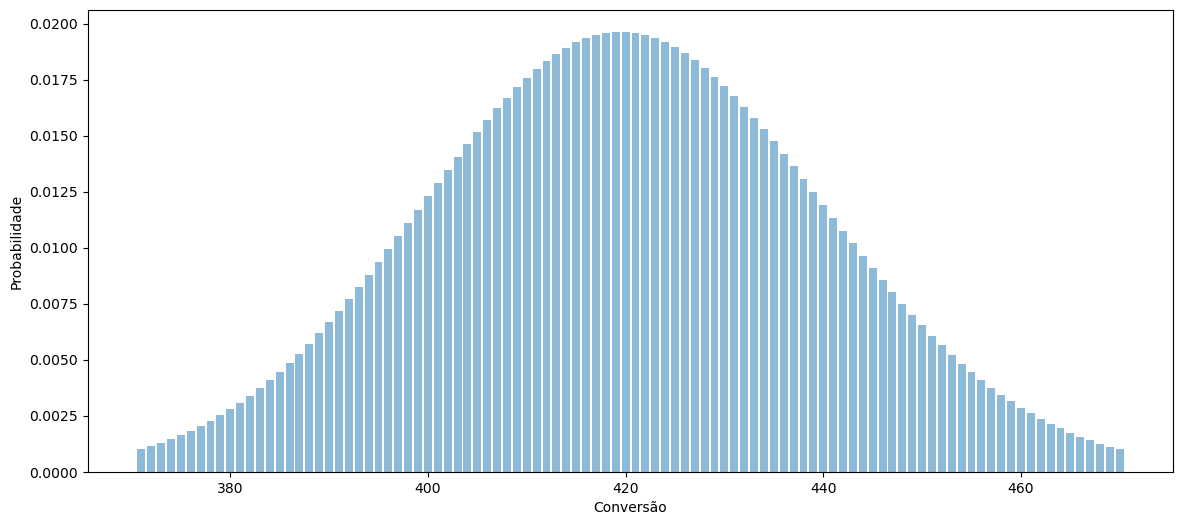

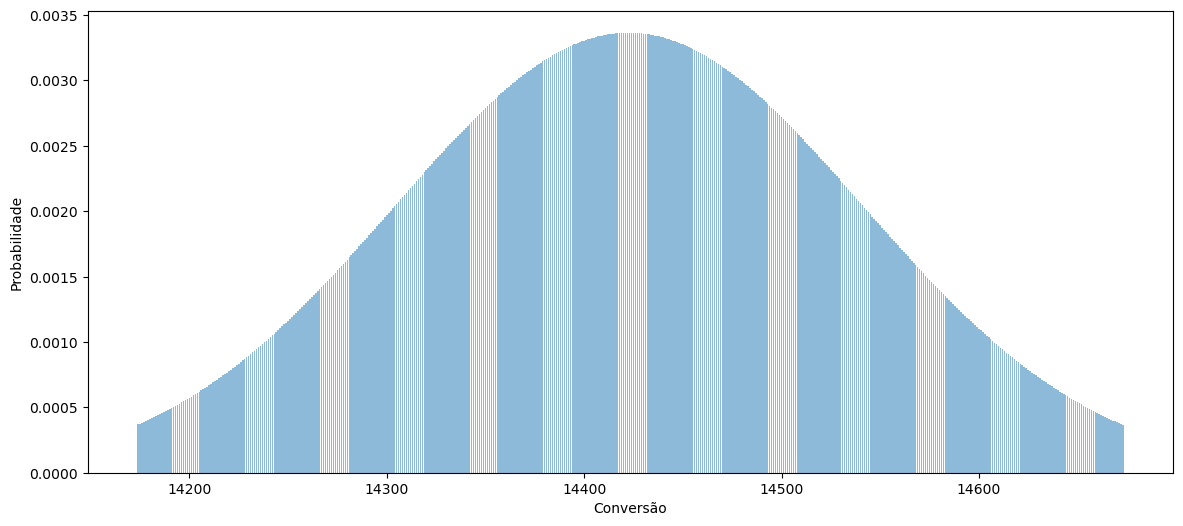

In [118]:
# Plot da distribuição dos 2 grupos

# Área de plotagem 
fig, ax = plt.subplots(figsize = (14,6))

# Gráfico de A
xA = np.linspace(convertido_A - 49, convertido_A + 50, 100)
yA = scs.binom(total_A, p_conversao_a1).pmf(xA)
ax.bar(xA, yA, alpha = 0.5)
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')
plt.show()

# Área de plotagem 
fig, ax = plt.subplots(figsize = (14,6))
# Gráfico de B
xB = np.linspace(convertido_B - 249, convertido_B + 250, 500)
yB = scs.binom(total_B, p_conversao_b1).pmf(xB)
ax.bar(xB, yB, alpha = 0.5)
plt.xlabel('Conversão')
plt.ylabel('Probabilidade')
plt.show()

In [ ]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

# Função para calcular a probabilidade agrupada
def prob_agrupada_func(total_A, total_B, c_esp_a, c_esp_b):
    return (c_esp_a + c_esp_b) / (total_A + total_B)

# Função para calcular o erro padrão agrupado
def erro_padrao_agrupado_func(total_A, total_B, c_esp_a, c_esp_b):
    # Calcula a probabilidade agrupada
    p_hat = prob_agrupada_func(total_A, total_B, c_esp_a, c_esp_b)
    # Calcula o erro padrão usando a fórmula apropriada
    SE = np.sqrt(p_hat * (1 - p_hat) * (1 / total_A + 1 / total_B))
    return SE

# Função para calcular o valor z com base no nível de significância
def z_val(sig_level=0.05, two_tailed=True):
    # Cria uma distribuição normal padrão
    z_dist = scs.norm()
    if two_tailed:
        # Se o teste for de duas caudas, divide o nível de significância por 2
        sig_level = sig_level / 2
        area = 1 - sig_level
    else:
        area = 1 - sig_level
    # Calcula o valor z correspondente à área desejada
    z = z_dist.ppf(area)
    return z

# Função para calcular o intervalo de confiança
def confidence_interval(sample_mean=0, sample_std=1, sample_size=1, sig_level=0.05):
    # Obtém o valor z com base no nível de significância
    z = z_val(sig_level)
    # Calcula os limites do intervalo de confiança
    left = sample_mean - z * sample_std / np.sqrt(sample_size)
    right = sample_mean + z * sample_std / np.sqrt(sample_size)
    return (left, right)

# Função para plotar as linhas do intervalo de confiança no gráfico
def plot_CI(ax, mu, s, sig_level=0.05, color='grey'):
    # Calcula os limites do intervalo de confiança
    left, right = confidence_interval(sample_mean=mu, sample_std=s, sig_level=sig_level)
    # Plota as linhas verticais no gráfico representando o intervalo de confiança
    ax.axvline(left, c=color, linestyle='--', alpha=0.5)
    ax.axvline(right, c=color, linestyle='--', alpha=0.5)

# Função para plotar a distribuição normal
def plot_norm_dist(ax, mu, std, with_CI=False, sig_level=0.05, label=None):
    # Cria um conjunto de valores "x" para a distribuição normal
    x = np.linspace(mu - 12 * std, mu + 12 * std, 1000)
    # Calcula os valores de probabilidade da distribuição normal
    y = scs.norm(mu, std).pdf(x)
    # Plota a distribuição normal no gráfico
    ax.plot(x, y, label=label)
    if with_CI:
        # Se for especificado, plota as linhas do intervalo de confiança no gráfico
        plot_CI(ax, mu, std, sig_level=sig_level)

# Função para plotar a distribuição da hipótese nula (H0)
def plot_H0(ax, stderr):
    # Plota a distribuição normal com média zero e erro padrão especificado
    plot_norm_dist(ax, 0, stderr, label="H0 - A - Hipótese Nula")
    # Plota as linhas do intervalo de confiança para H0
    plot_CI(ax, mu=0, s=stderr, sig_level=0.05)

# Função para plotar a distribuição da hipótese alternativa (H1)
def plot_H1(ax, stderr, d_hat):
    # Plota a distribuição normal com média "d_hat" e erro padrão especificado
    plot_norm_dist(ax, d_hat, stderr, label="H1 - B - Hipótese Alternativa")

# Função para preencher a área que representa o poder do teste no gráfico
def show_area(ax, d_hat, stderr, sig_level):
    # Calcula os limites do intervalo de confiança para H0
    left, right = confidence_interval(sample_mean=0, sample_std=stderr, sig_level=sig_level)
    # Cria um conjunto de valores "x" para preencher a área
    x = np.linspace(-12 * stderr, 12 * stderr, 1000)
    # Cria a distribuição da hipótese nula
    null = ab_dist(stderr, 'A')
    # Cria a distribuição da hipótese alternativa
    alternative = ab_dist(stderr, d_hat, 'B')
    # Preenche a área que representa o poder do teste no gráfico
    ax.fill_between(x, 0, alternative.pdf(x), color='green', alpha=0.25, where=(x > right))
    # Adiciona um texto indicando o poder do teste no gráfico
    ax.text(-3 * stderr, null.pdf(0), f'power = {1 - alternative.cdf(right):.3f}', fontsize=12, ha='right', color='k')


# Função para criar uma distribuição normal
def ab_dist(stderr, d_hat=0, group_type='A'):
    if group_type == 'A':
        sample_mean = 0
    elif group_type == 'B':
        sample_mean = d_hat
    dist = scs.norm(sample_mean, stderr)
    return dist


# Função para calcular o valor-p
def p_val(total_A, total_B, p_conversao_a1, p_conversao_b1):
    return scs.binom(total_A, p_conversao_a1).pmf(p_conversao_b1 * total_B)

#bcr = Taxa de Conversão de Referência, em resumo é a taxa de conversão do grupo de Controle.
# Função principal para executar o teste A/B
def abplot_func(total_A, total_B, bcr, d_hat, sig_level=0.05, show_p_value=False, show_legend=True):
    # Cria um gráfico
    fig, ax = plt.subplots(figsize=(14, 8))
    # Calcula o número de conversões nas amostras A e B
    c_esp_a = bcr * total_A
    c_esp_b = (bcr + d_hat) * total_B
    # Calcula o erro padrão agrupado
    stderr = erro_padrao_agrupado_func(total_A, total_B, c_esp_a, c_esp_b)
    # Plota a distribuição da hipótese nula (H0)
    plot_H0(ax, stderr)
    # Plota a distribuição da hipótese alternativa (H1)
    plot_H1(ax, stderr, d_hat)
    # Define os limites do gráfico
    ax.set_xlim(-8 * stderr, 14 * stderr)
    # Preenche a área que representa o poder do teste no gráfico
    show_area(ax, d_hat, stderr, sig_level)
    if show_p_value:
        # Se desejado, calcula e exibe o valor-p no gráfico
        null = ab_dist(stderr, 'controle')
        p_value = p_val(total_A, total_B, bcr, bcr + d_hat)
        ax.text(3 * stderr, null.pdf(0), f'Valor-p = {p_value:.4f}', fontsize=14, ha='left')
    if show_legend:
        # Se desejado, exibe a legenda no gráfico
        plt.legend(loc="lower left", bbox_to_anchor=(0, 1.0))
    plt.xlabel('X Normalmente distribuído, z-scores')
    plt.ylabel('Densidade de probabilidade das distribuições normais')
    plt.show()


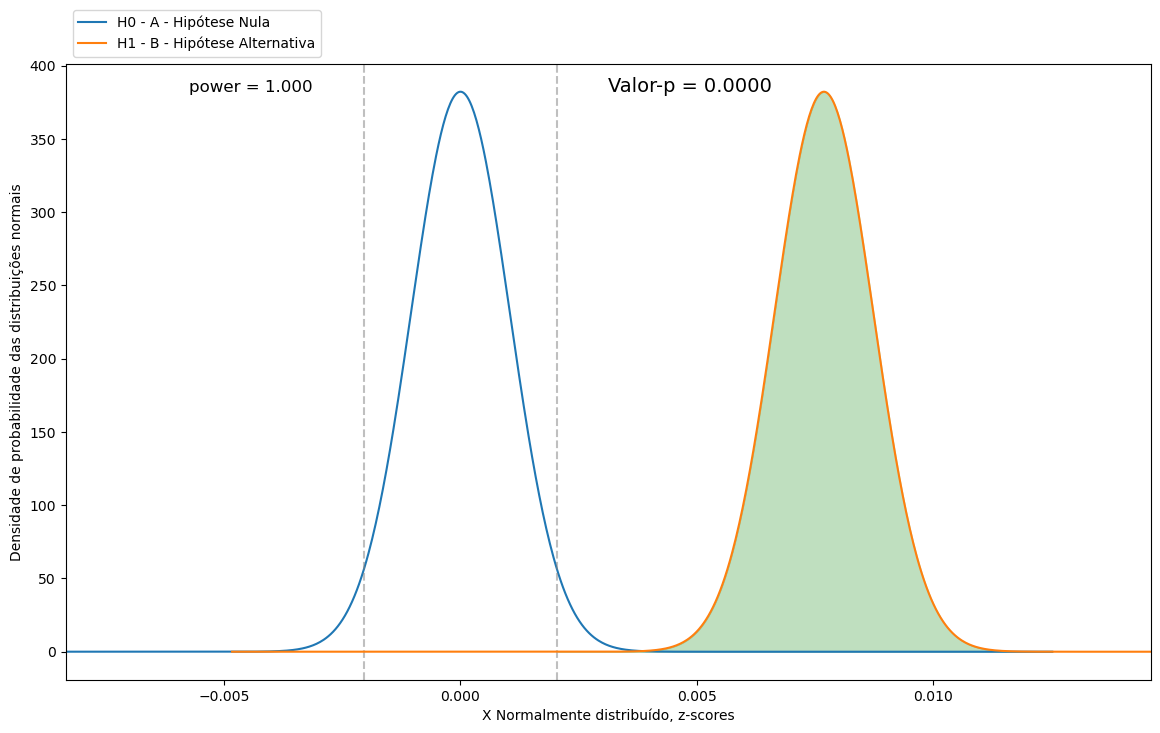

In [ ]:
#Tamanho do efeito, a diferença entre os valores.
d_hat = p_conversao_b1 - p_conversao_a1
# Executamos a função de teste A/B
abplot_func(total_A, total_B, p_conversao_a1, d_hat, show_p_value=True)

In [ ]:
# Função para encontrar o tamanho mínimo da amostra
def amostra_min(total_A, 
                                total_B, 
                                p_conversao_a1, 
                                p_conversao_b1, 
                                power = 0.8, 
                                sig_level = 0.05, 
                                two_sided = False):
    d_hat = p_conversao_b1 - p_conversao_a1
    k = total_A/total_B
    
    # Distribuição normal para determinar os valores z
    standard_norm = scs.norm(0, 1)

    # Encontramos o valor de z para o poder estatístico
    Z_beta = standard_norm.ppf(power)
    
    # Encontramos z alfa
    if two_sided == True:
        Z_alpha = standard_norm.ppf(1-sig_level/2)
    else:
        Z_alpha = standard_norm.ppf(1-sig_level)

    # Probabilidade agrupada
    pooled_prob = (p_conversao_a1 + p_conversao_b1) / 2

    # Tamanho mínimo da amostra
    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2 / d_hat**2)    

    return min_N

In [ ]:
# Calculamos o tamanho mínimo da amostra com two_sided = True
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power = 0.8, sig_level = 0.05, two_sided = True)

5631.787382615137

In [ ]:
# Calculamos o tamanho mínimo da amostra com two_sided = False
amostra_min(total_A, total_B, p_conversao_a1, p_conversao_b1, power = 0.8, sig_level = 0.05, two_sided = False)

4436.155093472385